In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ts_avg import MultiseasonalAveraging

In [25]:
start_date = pd.to_datetime('2/1/2023')
end_date = pd.to_datetime('3/1/2023')
date_series = pd.date_range(start=start_date, end=end_date, freq=pd.to_timedelta('6h'), closed='left')
df = pd.DataFrame({'date': date_series})
df['y'] = df.index
df['y'] = df['y'].apply(lambda x: (x%4)*((x//4)%7/18.))


<AxesSubplot:xlabel='date'>

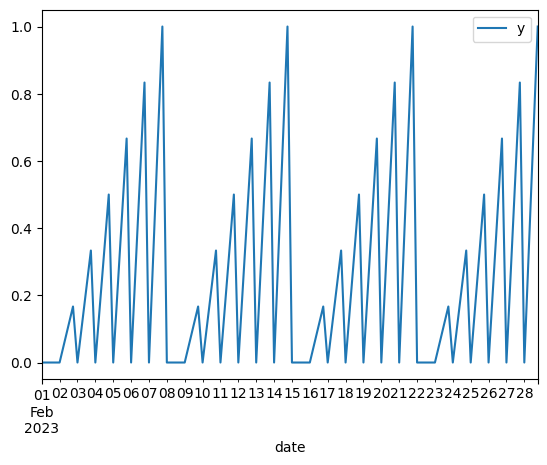

In [26]:
df.plot('date', 'y')


In [5]:
ma1 = MultiseasonalAveraging(df, date='date', y='y')

In [6]:
seasonal_dict_list = [{'period': 4, 'function': 'self'},
                      {'period': 28, 'function': 'self'},
                      {'period': 112, 'function': 'self'}]

In [7]:
ma1.get_averages(seasonal_dict_list, 112, 'test')
df2 = ma1.avg_df_list[0]['avg_df']

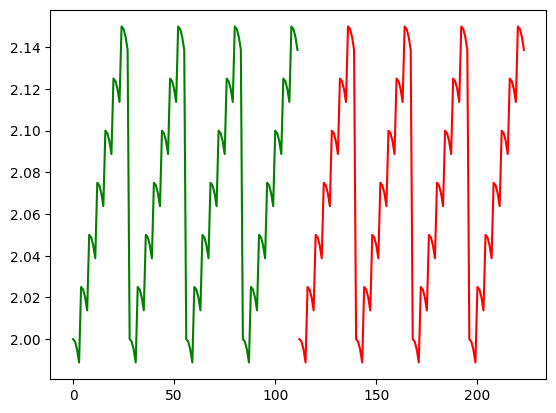

In [8]:
plt.plot(df.index, df['y'], 'g-')
plt.plot(df2.index, df2['yhat'], 'r-')


In [9]:
ma1.avg_df_list[0]['avg_df']

,date,yhat,ystd
112,2023-03-01 00:00:00,2.000000,0.0
113,2023-03-01 06:00:00,1.998750,0.0
114,2023-03-01 12:00:00,1.995004,0.0
115,2023-03-01 18:00:00,1.988771,0.0
116,2023-03-02 00:00:00,2.025000,0.0
...,...,...,...
219,2023-03-27 18:00:00,2.113771,0.0
220,2023-03-28 00:00:00,2.150000,0.0
221,2023-03-28 06:00:00,2.148750,0.0
222,2023-03-28 12:00:00,2.145004,0.0


In [55]:
np.outer(np.ones(4), (np.outer((np.std(np.arange(4)) * np.arange(7)), np.ones(4)).flatten())).flatten()

array([0.        , 0.        , 0.        , 0.        , 1.11803399,
       1.11803399, 1.11803399, 1.11803399, 2.23606798, 2.23606798,
       2.23606798, 2.23606798, 3.35410197, 3.35410197, 3.35410197,
       3.35410197, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       5.59016994, 5.59016994, 5.59016994, 5.59016994, 6.70820393,
       6.70820393, 6.70820393, 6.70820393, 0.        , 0.        ,
       0.        , 0.        , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 2.23606798, 2.23606798, 2.23606798, 2.23606798,
       3.35410197, 3.35410197, 3.35410197, 3.35410197, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 5.59016994, 5.59016994,
       5.59016994, 5.59016994, 6.70820393, 6.70820393, 6.70820393,
       6.70820393, 0.        , 0.        , 0.        , 0.        ,
       1.11803399, 1.11803399, 1.11803399, 1.11803399, 2.23606798,
       2.23606798, 2.23606798, 2.23606798, 3.35410197, 3.35410197,
       3.35410197, 3.35410197, 4.47213595, 4.47213595, 4.47213

In [54]:
np.std(np.arange(4)*2)

2.23606797749979